In [9]:
import matplotlib.pyplot as plt
import pickle
import numpy as np


In [12]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 10)  # Adjust this range as needed

# Arrays to store the I_nkq and I_nmc values
I_nkq_values = np.zeros([len(seed_numbers), 12])
I_nmc_values = np.zeros([len(seed_numbers), 12])

# Loop over seed numbers and load data
for seed in seed_numbers:
    # Load I_nkq_err_dict
    nkq_file_path = f"/home/zongchen/nest_bq/results/toy/kernel_x_matern__kernel_theta_matern/seed_{seed}__NKQ"
    with open(nkq_file_path, 'rb') as f:
        I_nkq_err_dict = pickle.load(f)
        print(len(I_nkq_err_dict.values()))
        I_nkq_values[seed, :] = np.array(list(I_nkq_err_dict.values()))  # Add all values to the list
    
    # Load I_nmc_err_dict
    nmc_file_path = f"/home/zongchen/nest_bq/results/toy/kernel_x_matern__kernel_theta_matern/seed_{seed}__NMC"
    with open(nmc_file_path, 'rb') as f:
        I_nmc_err_dict = pickle.load(f)
        I_nmc_values[seed, :] = np.array(list(I_nmc_err_dict.values()))  # Add all values to the list

# Convert lists to numpy arrays for easy computation
I_nkq_array = np.array(I_nkq_values)
I_nmc_array = np.array(I_nmc_values)

# Compute the median and standard deviation
I_nkq_median = np.median(I_nkq_array, axis=0)
I_nkq_q25 = np.percentile(I_nkq_array, 25, axis=0)
I_nkq_q75 = np.percentile(I_nkq_array, 75, axis=0)

I_nmc_median = np.median(I_nmc_array, axis=0)
I_nmc_q25 = np.percentile(I_nmc_array, 25, axis=0)
I_nmc_q75 = np.percentile(I_nmc_array, 75, axis=0)



12
12
12
5


ValueError: could not broadcast input array from shape (5,) into shape (12,)

In [11]:
len(I_nkq_err_dict.values())

12

In [9]:
I_nkq_array

array([[5.15413517e-03, 1.71657943e-04, 2.89033380e-07, 1.04994378e-08,
        2.71748601e-09],
       [1.40175521e-01, 1.89859347e-04, 1.27738616e-07, 3.37177380e-06,
        4.35004459e-08],
       [8.26287642e-02, 6.93119509e-05, 1.26544944e-06, 2.52962771e-08,
        4.57574671e-08],
       [6.91212248e-03, 1.20028073e-03, 2.01252465e-06, 1.60453169e-07,
        2.29595045e-08],
       [2.64131539e-02, 1.00937148e-04, 4.51361211e-06, 4.15484180e-07,
        1.80238700e-07],
       [9.55719128e-03, 2.17423862e-04, 7.28148109e-07, 7.88327981e-08,
        5.38230225e-08],
       [5.18295281e-02, 2.06899240e-05, 8.43666896e-07, 7.74514231e-09,
        1.05706048e-08],
       [2.18731046e-01, 4.89796112e-05, 4.95861968e-07, 2.94667501e-07,
        2.53743821e-07],
       [4.50590327e-02, 1.88805880e-05, 7.11704342e-06, 4.07788425e-09,
        5.05753839e-08],
       [7.44967535e-03, 1.61360949e-04, 1.15253397e-06, 3.85105551e-07,
        6.82163801e-08],
       [4.59717363e-02, 3.1738

In [10]:
# Extract the keys
keys = list(I_nkq_err_dict.keys())

# Extract the unique values from the first and second elements of the keys
N_array = np.array(sorted(set([k[0] for k in keys])), dtype=float)
cost_array = N_array ** 2

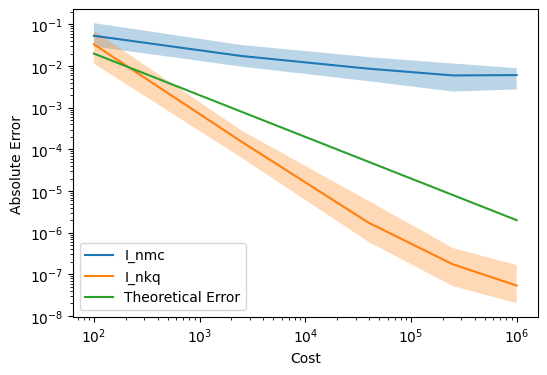

In [11]:
# First, fix N and plot the error as a function of T
theoretical_error = N_array ** (-2) + N_array ** (-2)

fig1 = plt.figure(figsize=(6, 4))

plt.plot(cost_array, I_nmc_median, label=f'I_nmc')
plt.fill_between(cost_array, I_nmc_q25, I_nmc_q75, alpha=0.3)
plt.plot(cost_array, I_nkq_median, label=f'I_nkq')
plt.fill_between(cost_array, I_nkq_q25, I_nkq_q75, alpha=0.3)
plt.plot(cost_array, theoretical_error, label='Theoretical Error')
plt.xlabel('Cost')
plt.ylabel('Absolute Error')
plt.yscale('log')
plt.xscale('log')
plt.legend()

